# Business Understanding

1. Problem Statement: We have data of pricing for each listing, with factors related to it

2. Objective: What factors highly influence the prices of listings in Seattle?

# Data Understanding and Preparation

Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way. As part of the Airbnb Inside initiative, this dataset describes the listing activity of homestays in Seattle, WA.

Content
The following Airbnb activity is included in this Seattle dataset:

Listings, including full descriptions and average review score
Reviews, including unique id for each reviewer and detailed comments
Calendar, including listing id and the price and availability for that day

Data Preparation

- Checking dataset
- Data Cleansing
    1. 1st Replace NaN values with 0
    2. Converting prices to float


In [48]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
from collections import Counter

df = pd.read_csv('data_airbnb.csv')
df=df[['id','name','summary','longitude','latitude','space','description','instant_bookable','neighborhood_overview','neighbourhood_cleansed','host_id','host_name','host_since',
              'host_response_time','street', 'zipcode','review_scores_rating','property_type','room_type','accommodates','bathrooms','bedrooms','beds','reviews_per_month','amenities','cancellation_policy','number_of_reviews','price']]

Getting to know your data

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9699 entries, 0 to 9698
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      9699 non-null   int64  
 1   name                    9698 non-null   object 
 2   summary                 9420 non-null   object 
 3   longitude               9699 non-null   float64
 4   latitude                9699 non-null   float64
 5   space                   6157 non-null   object 
 6   description             9553 non-null   object 
 7   instant_bookable        9699 non-null   object 
 8   neighborhood_overview   5883 non-null   object 
 9   neighbourhood_cleansed  9699 non-null   object 
 10  host_id                 9699 non-null   int64  
 11  host_name               9699 non-null   object 
 12  host_since              9699 non-null   object 
 13  host_response_time      6002 non-null   object 
 14  street                  9699 non-null   

In [50]:
#Extracting prices from the table
price = df['price']
prices=[]

#clean the data to make it float
for p in price:
    p=float(p[1:].replace(',',''))
    prices.append(p)

#replace the price column with the new column
df['price']=prices

1.Checking NaN Values

In [51]:
df.describe(include='all')

,id,name,summary,longitude,latitude,space,description,instant_bookable,neighborhood_overview,neighbourhood_cleansed,...,room_type,accommodates,bathrooms,bedrooms,beds,reviews_per_month,amenities,cancellation_policy,number_of_reviews,price
count,9.699000e+03,9698,9420,9699.000000,9699.000000,6157,9553,9699,5883,9699,...,9699,9699.000000,9694.000000,9694.000000,9686.000000,7687.000000,9699,9699,9699.000000,9699.000000
unique,NaN,9470,9220,NaN,NaN,5999,9460,2,5502,62,...,3,NaN,NaN,NaN,NaN,NaN,9470,5,NaN,NaN
top,NaN,Appartement au coeur de Bordeaux,This apartment has all the comfort and calm ne...,NaN,NaN,All of the best adresses and restaurants are w...,"Nestled in a calm street in the city-centre, t...",f,Quartier calme,Centre ville (Bordeaux),...,Entire home/apt,NaN,NaN,NaN,NaN,NaN,{},flexible,NaN,NaN
freq,NaN,9,24,NaN,NaN,6,6,5873,11,1813,...,7326,NaN,NaN,NaN,NaN,NaN,22,4446,NaN,NaN
mean,1.899018e+07,NaN,NaN,-0.585610,44.840214,NaN,NaN,NaN,NaN,NaN,...,NaN,3.478503,1.214411,1.471941,1.924943,1.196504,NaN,NaN,18.939581,84.308279
std,8.810791e+06,NaN,NaN,0.039966,0.027586,NaN,NaN,NaN,NaN,NaN,...,NaN,1.963113,0.535695,1.090644,1.318563,1.523132,NaN,NaN,39.049562,133.945202
min,2.892500e+04,NaN,NaN,-0.802510,44.739480,NaN,NaN,NaN,NaN,NaN,...,NaN,1.000000,0.000000,0.000000,0.000000,0.010000,NaN,NaN,0.000000,9.000000
25%,1.280556e+07,NaN,NaN,-0.595430,44.827410,NaN,NaN,NaN,NaN,NaN,...,NaN,2.000000,1.000000,1.000000,1.000000,0.220000,NaN,NaN,1.000000,40.000000
50%,1.929355e+07,NaN,NaN,-0.576210,44.838580,NaN,NaN,NaN,NaN,NaN,...,NaN,3.000000,1.000000,1.000000,1.000000,0.640000,NaN,NaN,5.000000,60.000000
75%,2.606499e+07,NaN,NaN,-0.567335,44.853125,NaN,NaN,NaN,NaN,NaN,...,NaN,4.000000,1.000000,2.000000,2.000000,1.530000,NaN,NaN,19.000000,95.000000


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9699 entries, 0 to 9698
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      9699 non-null   int64  
 1   name                    9698 non-null   object 
 2   summary                 9420 non-null   object 
 3   longitude               9699 non-null   float64
 4   latitude                9699 non-null   float64
 5   space                   6157 non-null   object 
 6   description             9553 non-null   object 
 7   instant_bookable        9699 non-null   object 
 8   neighborhood_overview   5883 non-null   object 
 9   neighbourhood_cleansed  9699 non-null   object 
 10  host_id                 9699 non-null   int64  
 11  host_name               9699 non-null   object 
 12  host_since              9699 non-null   object 
 13  host_response_time      6002 non-null   object 
 14  street                  9699 non-null   

In [53]:
df.isna().sum()

id                           0
name                         1
summary                    279
longitude                    0
latitude                     0
space                     3542
description                146
instant_bookable             0
neighborhood_overview     3816
neighbourhood_cleansed       0
host_id                      0
host_name                    0
host_since                   0
host_response_time        3697
street                       0
zipcode                    120
review_scores_rating      2177
property_type                0
room_type                    0
accommodates                 0
bathrooms                    5
bedrooms                     5
beds                        13
reviews_per_month         2012
amenities                    0
cancellation_policy          0
number_of_reviews            0
price                        0
dtype: int64

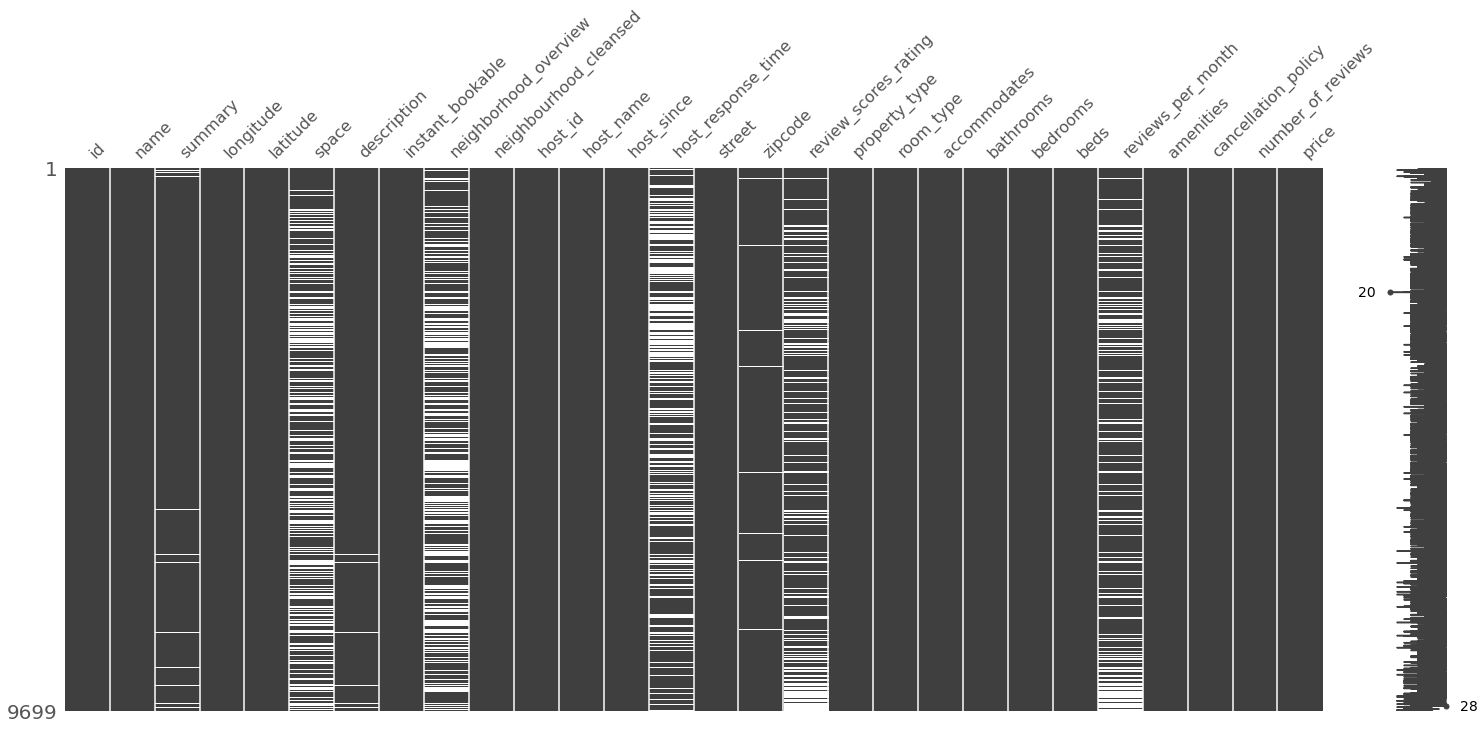

In [54]:
#Visualize missingness, reference: https://towardsdatascience.com/using-the-missingno-python-library-to-identify-and-visualise-missing-data-prior-to-machine-learning-34c8c5b5f009
msno.matrix(df)
plt.show()

In [55]:
# replacing NaN values with 0
df.fillna(0, inplace=True)

#exclude the listings with 0 for price,beds,bedrooms,accomodates etc
df = df[df.bathrooms >0]
df = df[df.bedrooms > 0]
df = df[df.beds > 0]
df = df[df.price  > 0]
df = df[df.review_scores_rating  > 0]
df = df[df.reviews_per_month > 0]
df = df[df.accommodates  > 0]
df.head()

,id,name,summary,longitude,latitude,space,description,instant_bookable,neighborhood_overview,neighbourhood_cleansed,...,room_type,accommodates,bathrooms,bedrooms,beds,reviews_per_month,amenities,cancellation_policy,number_of_reviews,price
0,28925,En el centro :Cuartos privados en casa familial,Vivo en una casa grande que comparto todo el a...,-0.59350,44.84910,"In the city center of Bordeaux , in the family...","In the city center of Bordeaux , in the family...",f,"Ein paar Minuten zu Fuß von der Innenstadt , d...",Centre ville (Bordeaux),...,Private room,2,1.0,1.0,2.0,0.10,"{TV,Internet,Wifi,Kitchen,""Paid parking off pr...",strict_14_with_grace_period,2,24.0
1,40151,Sunny flat aux Chartrons,"Situé dans le quartier des Chartrons, cet appa...",-0.57460,44.85653,"Situé dans le quartier des Chartrons, cet appa...","Situé dans le quartier des Chartrons, cet appa...",f,Le quartier des Chartrons est situé dans le ce...,Chartrons - Grand Parc - Jardin Public,...,Entire home/apt,2,1.0,1.0,1.0,0.29,"{TV,Internet,Wifi,Kitchen,""Free parking on pre...",moderate,30,71.0
3,218103,B&B (Website hidden by Airbnb) tropical garden,Ce studio spacieux de 35 m² est tout équipé po...,-0.54842,44.81418,"The Bambooyard : ""Le clos des Bambous"", in Bè...","The Bambooyard : ""Le clos des Bambous"", in Bè...",t,Idéalement situé Bordeaux Sud à l'entrée de Bè...,Bgles,...,Private room,4,1.0,1.0,1.0,0.28,"{TV,Wifi,""Air conditioning"",Pool,Kitchen,""Free...",strict_14_with_grace_period,25,100.0
4,222887,"Bordeaux Terrace - spectacular view, sleeps 2 - 4","With an extraordinary view over the river, Bor...",-0.56590,44.83635,In an 18th century building in the historic he...,"With an extraordinary view over the river, Bor...",f,Bordeaux Terrace is ideally situated to visit ...,Bordeaux Sud,...,Entire home/apt,4,1.0,2.0,4.0,0.37,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Paid par...",moderate,33,155.0
5,317273,"Bordeaux City Gardens - large 1 bd, park adjacent",A spacious one bedroom apartment (93 sq metres...,-0.58034,44.84734,This spacious one bedroom apartment (93 sq met...,A spacious one bedroom apartment (93 sq metres...,t,Bordeaux's famous Jardin Public is at the end ...,Chartrons - Grand Parc - Jardin Public,...,Entire home/apt,3,1.5,1.0,2.0,0.30,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Paid par...",moderate,17,130.0


In [56]:
# After removing 0, we left with only 2834 listing id
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6667 entries, 0 to 9599
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      6667 non-null   int64  
 1   name                    6667 non-null   object 
 2   summary                 6667 non-null   object 
 3   longitude               6667 non-null   float64
 4   latitude                6667 non-null   float64
 5   space                   6667 non-null   object 
 6   description             6667 non-null   object 
 7   instant_bookable        6667 non-null   object 
 8   neighborhood_overview   6667 non-null   object 
 9   neighbourhood_cleansed  6667 non-null   object 
 10  host_id                 6667 non-null   int64  
 11  host_name               6667 non-null   object 
 12  host_since              6667 non-null   object 
 13  host_response_time      6667 non-null   object 
 14  street                  6667 non-null   

# Analysis and Visualization

# 1. Create a histogram of listing prices in Seattle, to see the distribution

(array([6.634e+03, 3.100e+01, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00]),
 array([   9.        ,  445.73333333,  882.46666667, 1319.2       ,
        1755.93333333, 2192.66666667, 2629.4       , 3066.13333333,
        3502.86666667, 3939.6       , 4376.33333333, 4813.06666667,
        5249.8       , 5686.53333333, 6123.26666667, 6560.        ]),
 <a list of 15 Patch objects>)

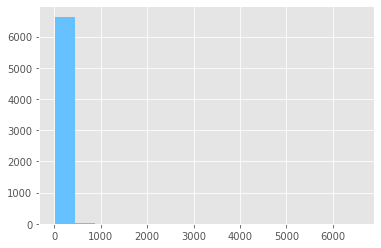

In [57]:
plt.hist(df['price'],bins=15,color = '#66c2ff')

In [58]:
df.describe(include='all')

,id,name,summary,longitude,latitude,space,description,instant_bookable,neighborhood_overview,neighbourhood_cleansed,...,room_type,accommodates,bathrooms,bedrooms,beds,reviews_per_month,amenities,cancellation_policy,number_of_reviews,price
count,6.667000e+03,6667,6667.0,6667.000000,6667.000000,6667.0,6667.0,6667,6667.0,6667,...,6667,6667.000000,6667.000000,6667.000000,6667.000000,6667.000000,6667,6667,6667.000000,6667.000000
unique,NaN,6576,6432.0,NaN,NaN,4509.0,6565.0,2,4184.0,62,...,3,NaN,NaN,NaN,NaN,NaN,6602,5,NaN,NaN
top,NaN,Chambre chez l'habitant,0.0,NaN,NaN,0.0,0.0,f,0.0,Centre ville (Bordeaux),...,Entire home/apt,NaN,NaN,NaN,NaN,NaN,{},flexible,NaN,NaN
freq,NaN,4,151.0,NaN,NaN,2081.0,68.0,4129,2291.0,1203,...,4938,NaN,NaN,NaN,NaN,NaN,7,2681,NaN,NaN
mean,1.791008e+07,NaN,NaN,-0.585230,44.840254,NaN,NaN,NaN,NaN,NaN,...,NaN,3.595770,1.216889,1.613919,1.989801,1.159919,NaN,NaN,23.830808,80.699115
std,8.446624e+06,NaN,NaN,0.040688,0.027102,NaN,NaN,NaN,NaN,NaN,...,NaN,1.988702,0.525223,0.987943,1.309415,1.466381,NaN,NaN,41.846904,104.721509
min,2.892500e+04,NaN,NaN,-0.802510,44.751410,NaN,NaN,NaN,NaN,NaN,...,NaN,1.000000,0.500000,1.000000,1.000000,0.010000,NaN,NaN,1.000000,9.000000
25%,1.218088e+07,NaN,NaN,-0.594600,44.827515,NaN,NaN,NaN,NaN,NaN,...,NaN,2.000000,1.000000,1.000000,1.000000,0.230000,NaN,NaN,3.000000,40.000000
50%,1.862953e+07,NaN,NaN,-0.575440,44.838700,NaN,NaN,NaN,NaN,NaN,...,NaN,3.000000,1.000000,1.000000,2.000000,0.630000,NaN,NaN,9.000000,60.000000
75%,2.472898e+07,NaN,NaN,-0.566760,44.853425,NaN,NaN,NaN,NaN,NaN,...,NaN,4.000000,1.000000,2.000000,3.000000,1.470000,NaN,NaN,26.000000,90.000000


As you can see on the histogram and table describe, prices of listings is not normaly distributed. It is positively skewed where mean is higher than the median

We see that maximum no of listings are in price range from 0-200 dollars.

# 2. Counting the total no of listing by location in Seattle city

In [59]:
df['neighbourhood_cleansed'].value_counts().head(15)

Centre ville (Bordeaux)                      1203
Bordeaux Sud                                  994
Chartrons - Grand Parc - Jardin Public        626
Bordeaux Maritime                             405
Saint Augustin - Tauzin - Alphonse Dupeux     404
Nansouty - Saint Gens                         345
Talence                                       267
Caudran                                       264
La Bastide                                    218
Bgles                                         201
Le Bouscat                                    153
Saint-Mdard-en-Jalles                         116
Villenave-d'Ornon                             114
Gradignan                                      87
Bruges                                         85
Name: neighbourhood_cleansed, dtype: int64

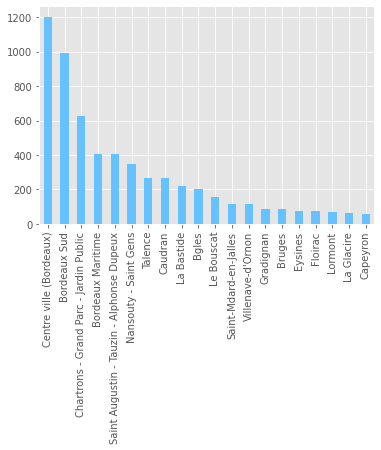

In [60]:
df['neighbourhood_cleansed'].value_counts().head(20).plot(kind='bar',color = '#66c2ff')

We see that Broadway Belttown has maximum no of listings.

# 3. Price Distribution of listings across latitudes and longitudes in Seattle city.

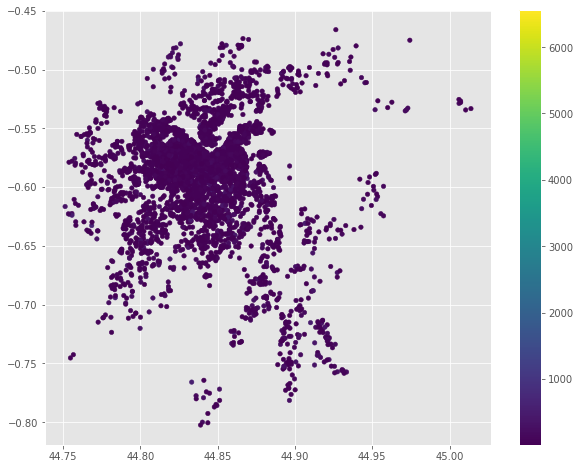

In [61]:
plt.figure(figsize=(10,8))
points = plt.scatter(df['latitude'], df['longitude'], c=df["price"], s=20, cmap="viridis") 
plt.colorbar(points)

* Price Distribution of listings across latitudes and longitudes in Seattle city.
* Which shows that maximum no of listings have price between 0 -200 dollars.
* Also the max no of listings having prices higher than 200 are certainly more in the center of City

# 4. Visualizing categorization of listings based on roomtype

In [62]:
#Categorizing differernt listings based on room_type
roomType_DF=df.groupby('room_type').id.count()
roomType_DF=roomType_DF.reset_index()
roomType_DF=roomType_DF.rename(columns={'id':'number_Of_Listings'})
roomType_DF


,room_type,number_Of_Listings
0,Entire home/apt,4938
1,Private room,1690
2,Shared room,39


Visualizing the above categorization

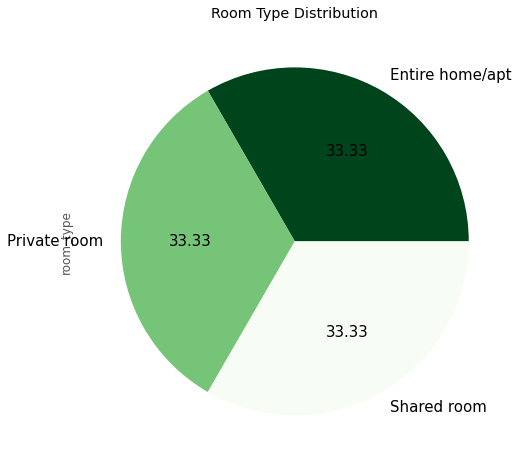

In [63]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

#room = inputDF.room_type
room = roomType_DF.room_type
r = Counter(room)

room_df = pd.DataFrame.from_dict(r, orient='index').sort_values(by=0)
room_df.columns = ['room_type']
room_df.plot.pie(y = 'room_type', 
                 colormap = 'Greens_r', 
                 figsize=(8,8), 
                 fontsize = 15, autopct = '%.2f',
                 legend = False,
                 title = 'Room Type Distribution')

# 5. Analyzing and plotting the number of listings based on their property type¶

Text(0, 0.5, 'Number of listings')

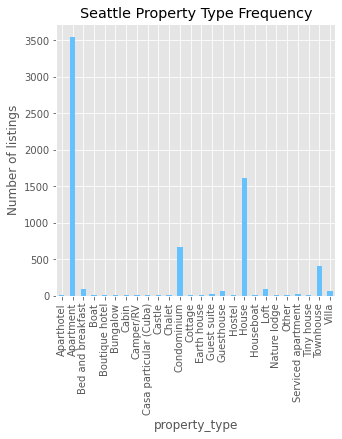

In [64]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

propertytype_DF = df.groupby('property_type').id.count()
propertytype_DF= propertytype_DF.reset_index()
propertytype_DF=propertytype_DF.rename(columns={'id':'Number_Of_Listings'})

objects = propertytype_DF['property_type']
y_pos = propertytype_DF['Number_Of_Listings']

propertytype_DF.plot(kind='bar', 
           x='property_type',
           y='Number_Of_Listings',
           color = '#66c2ff', 
           figsize =(5,5), 
           title = 'Seattle Property Type Frequency', 
           legend = False)
plt.ylabel('property type')
plt.ylabel('Number of listings')


* It can be concluded that people are more inclined towards listing their entire property than listing private rooms or shared rooms.It can also be seen that property type also plays an important role.
* Not surprisingly, apartment and houses take up an overwhelming majority of all listings, although we do see few instances unfamiliar residencies here and there.

# 6. Analyzing the prices for different room type and property type and plotting the same on a heatmap

In [65]:
roomProperty_DF = df.groupby(['property_type','room_type']).price.mean()
roomProperty_DF = roomProperty_DF.reset_index()
roomProperty_DF=roomProperty_DF.sort_values('price',ascending=[0])
roomProperty_DF.head()

,property_type,room_type,price
22,Cottage,Entire home/apt,495.000000
50,Villa,Entire home/apt,273.333333
16,Castle,Private room,208.428571
8,Boutique hotel,Private room,192.000000
43,Serviced apartment,Entire home/apt,152.611111


(26.5, -0.5)

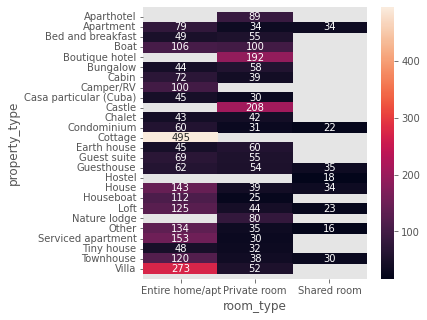

In [66]:
#Plotting the same on a heatMap

import seaborn as sns

plt.figure(figsize=(5,5))
ax = sns.heatmap(roomProperty_DF.groupby(['property_type', 'room_type']).price.mean().unstack(),annot=True, fmt=".0f")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

* This heatmap allows us to see all prices of listings broken down by property type and room type. This gives us much better understanding of the price breakdown in Seattle.
* It can be analyzed that for almost all property type, prices for Entire home/apartment are the maximum

# 7. Analysing how number of bedrooms and location affect the price of the listings

Text(0, 0.5, 'Number of listings')

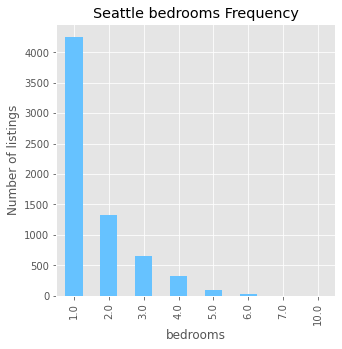

In [67]:
#First we want to see frequency of number of bedrooms 
%matplotlib inline

propertytype_DF = df.groupby('bedrooms').id.count()
propertytype_DF= propertytype_DF.reset_index()
propertytype_DF=propertytype_DF.rename(columns={'id':'Number_Of_Listings'})

objects = propertytype_DF['bedrooms']
y_pos = propertytype_DF['Number_Of_Listings']

propertytype_DF.plot(kind='bar', 
           x='bedrooms',
           y='Number_Of_Listings',
           color = '#66c2ff', 
           figsize =(5,5), 
           title = 'Seattle bedrooms Frequency', 
           legend = False)
plt.ylabel('bedrooms')
plt.ylabel('Number of listings')


It can be seen above that mostly listings in Seattle has one bedrooms

In [68]:
roomBed_DF = df.groupby(['neighbourhood_cleansed', 'bedrooms']).price.mean()
roomBed_DF = roomBed_DF.reset_index()
roomBed_DF=roomBed_DF.sort_values('price',ascending=[0])
roomBed_DF.head()

,neighbourhood_cleansed,bedrooms,price
51,Bordeaux Sud,10.0,890.0
104,Chartrons - Grand Parc - Jardin Public,6.0,600.0
92,Centre ville (Bordeaux),6.0,542.0
123,Floirac,7.0,480.0
195,Magonty,5.0,480.0


(62.5, -0.5)

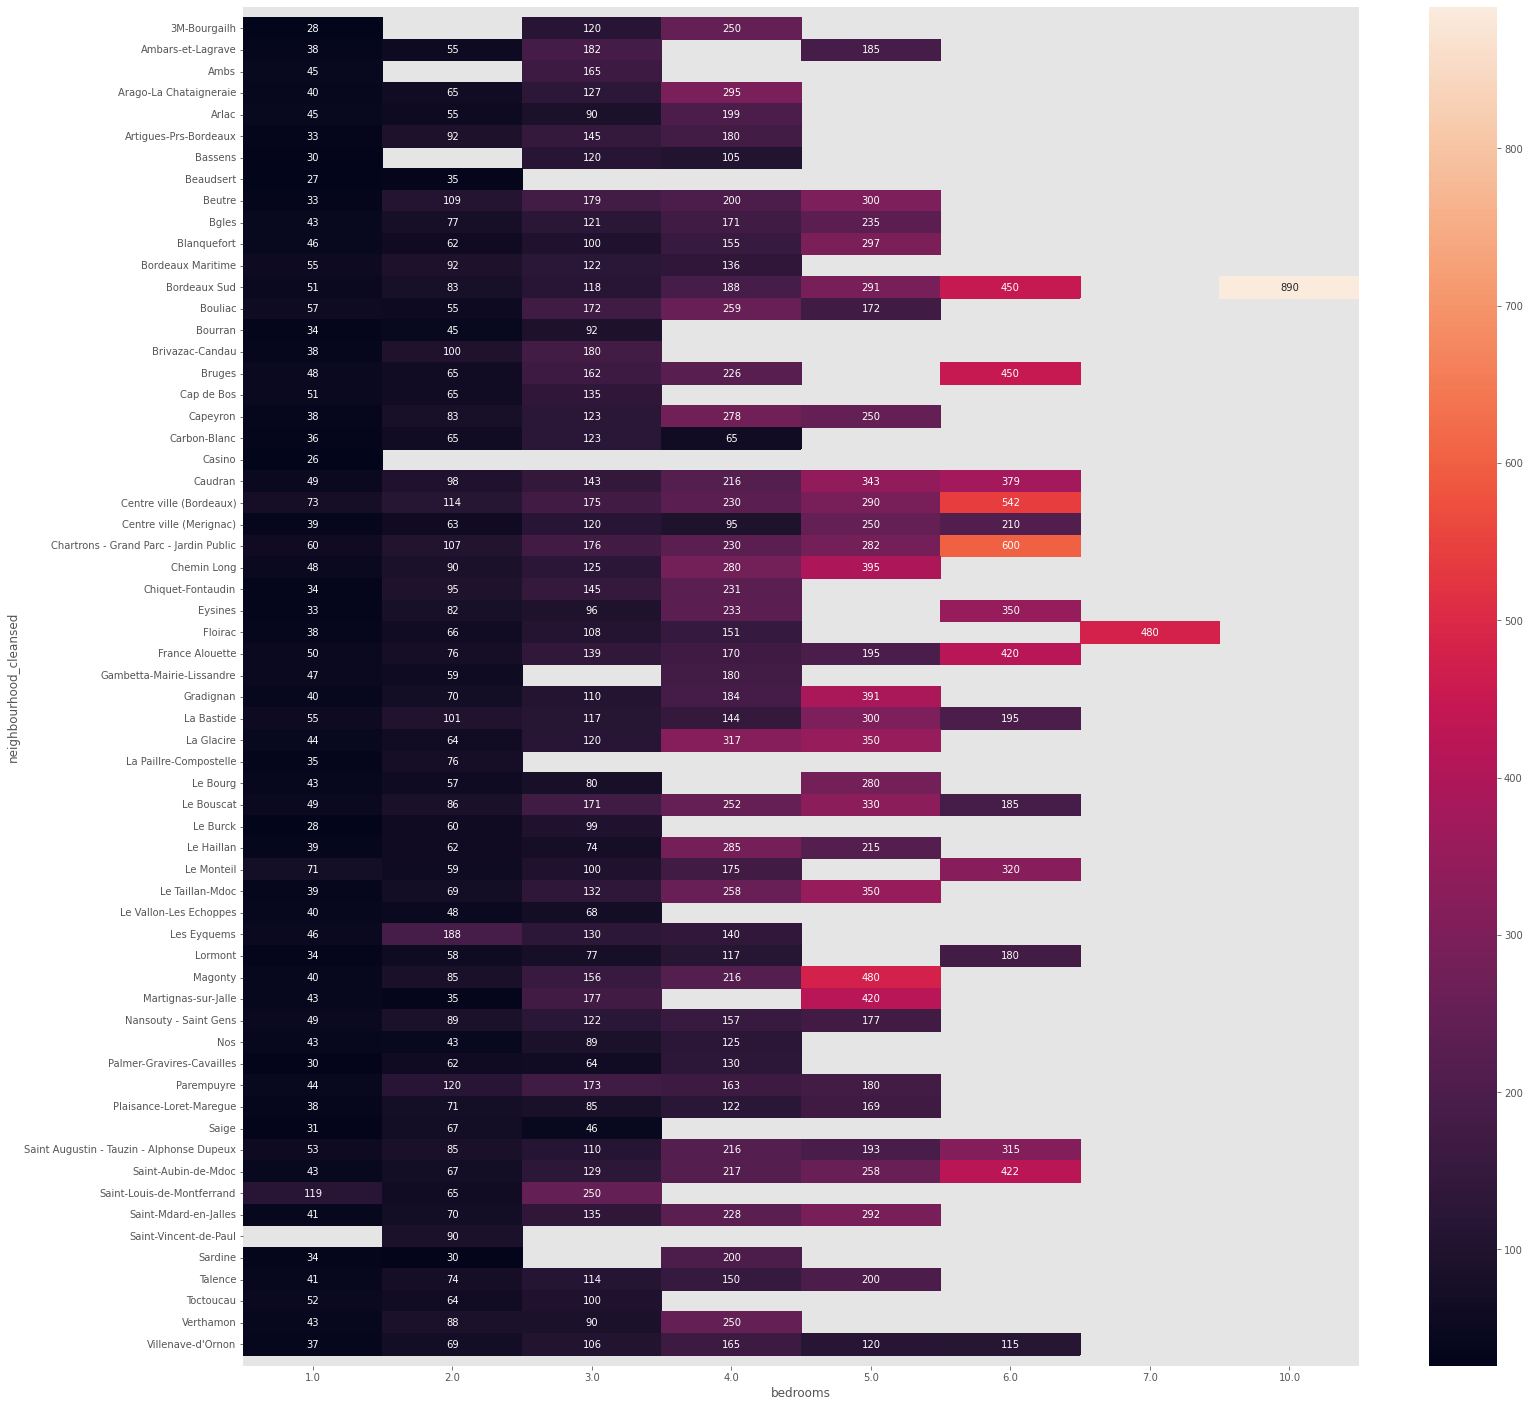

In [69]:
#HeatMap for variation of prices with number of bedrooms for listings from all neighbourhood

plt.figure(figsize=(25,25))
ax = sns.heatmap(roomBed_DF.groupby([
        'neighbourhood_cleansed', 'bedrooms']).price.mean().unstack(),annot=True, fmt=".0f")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

It can be analyzed that with the increase in the number of bedrooms price of listing increases. Although, it depends upon the neighbourhood as well.

So this analysis gives us data points that the prices of listings on Airbnb depends upon the room type, property type, number of bedrooms and neighbourhood.



# 8. Additional plotting Neighbourhood with price, room type ,property type to draw any possible conculsion¶


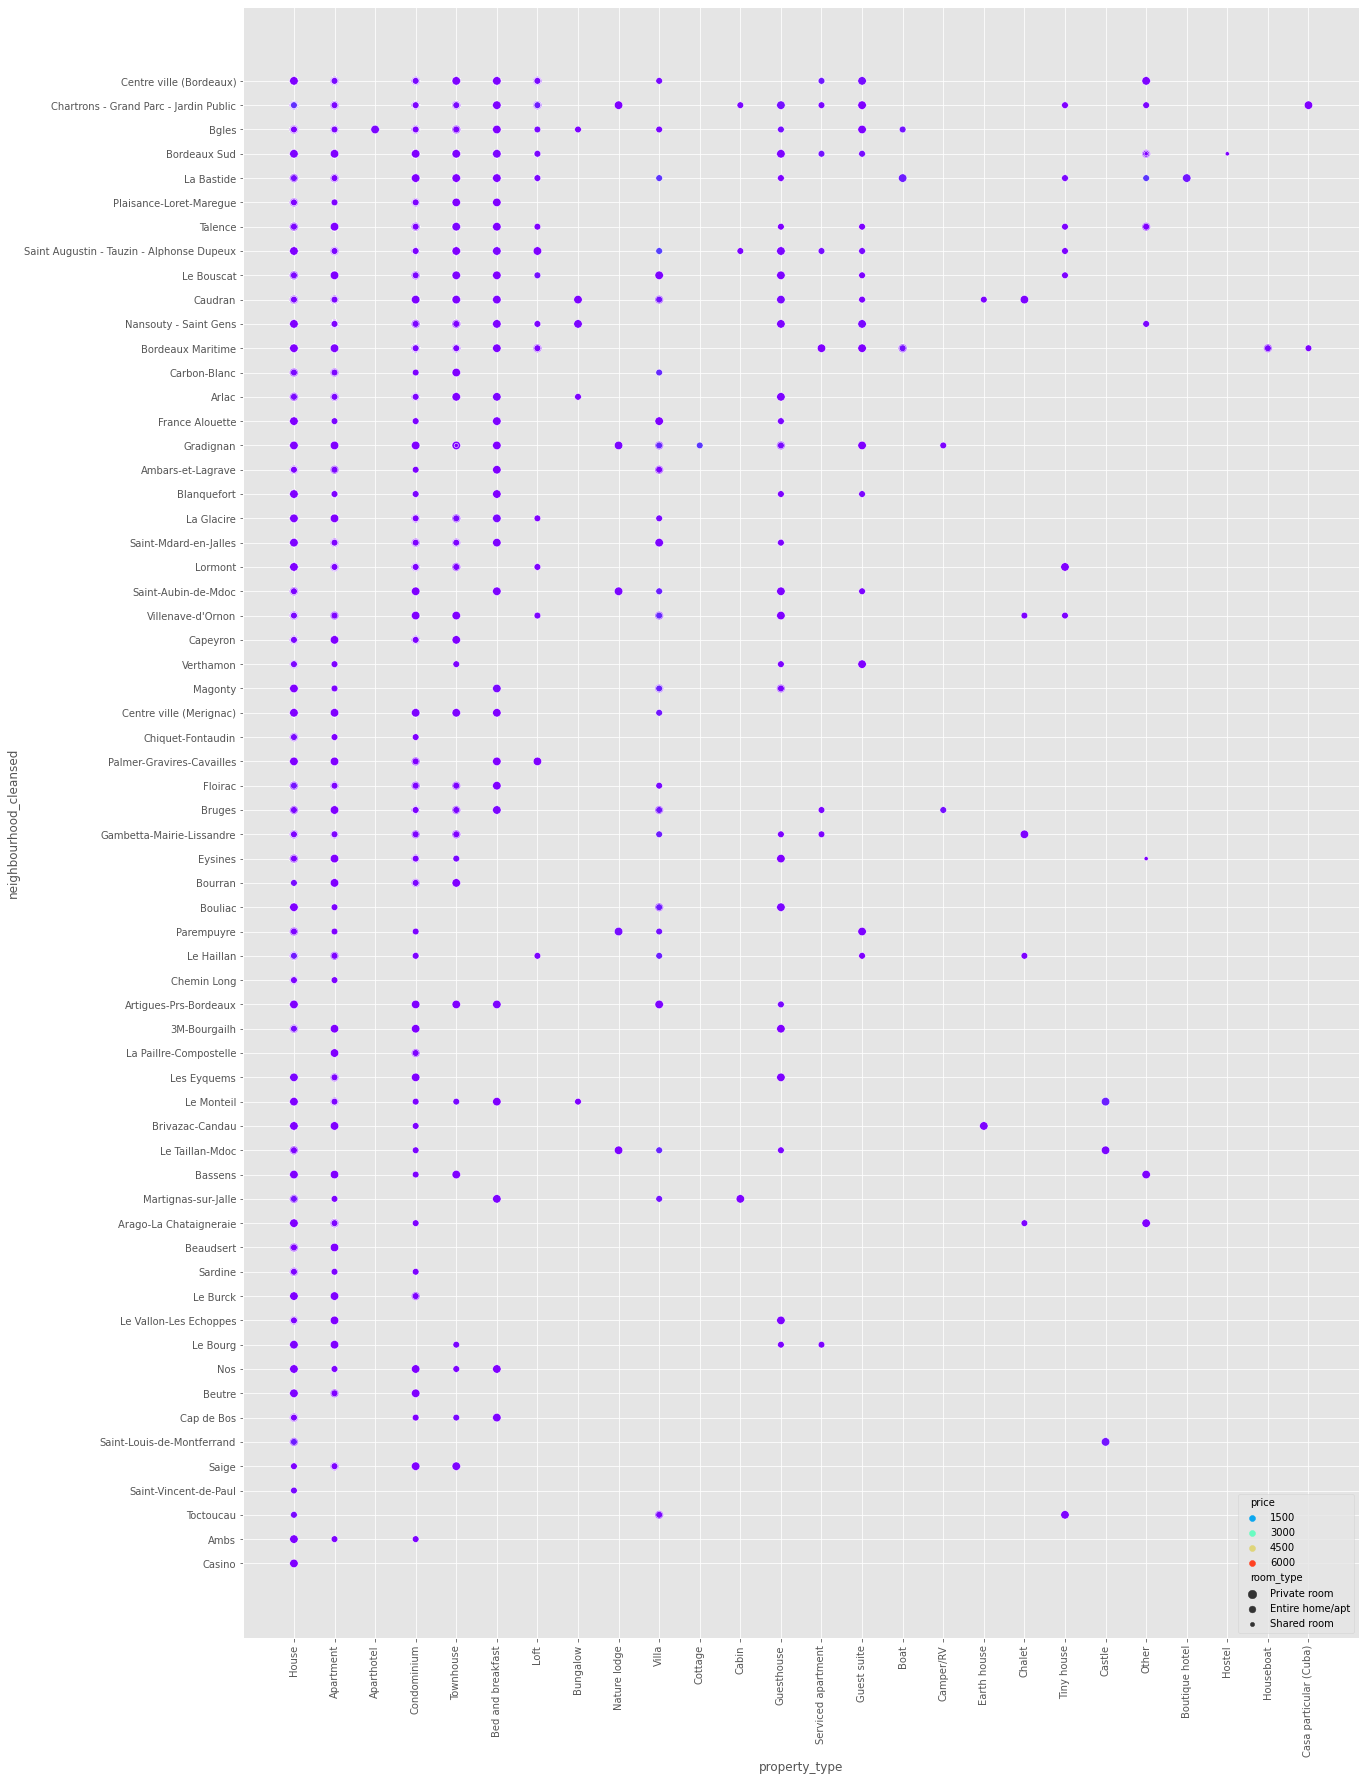

In [70]:
plt.figure(figsize=(20,30))
plt.xticks(rotation=90)
sns.scatterplot(y='neighbourhood_cleansed',hue='price',size='room_type',x='property_type',palette='rainbow',data=df)

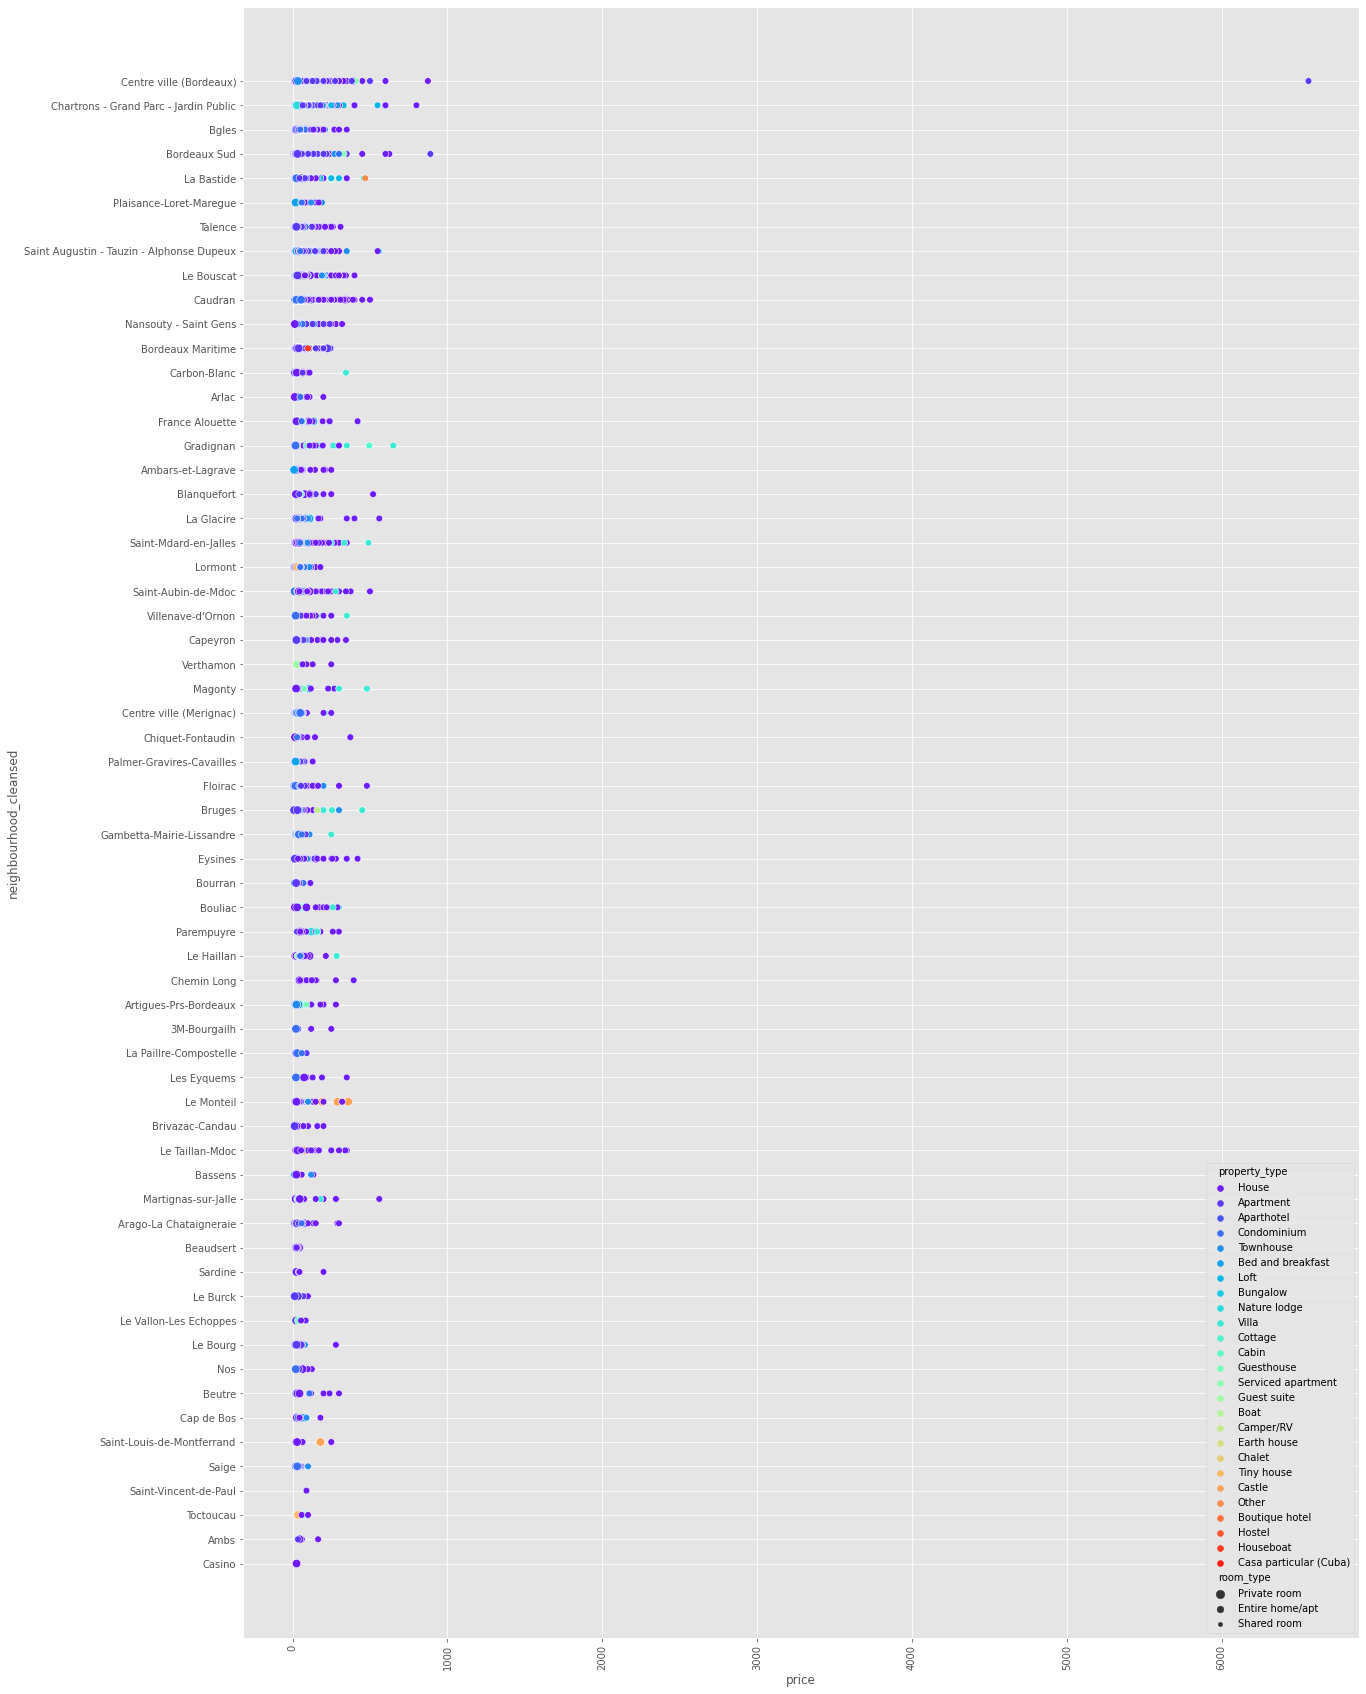

In [71]:
plt.figure(figsize=(20,30))
plt.xticks(rotation=90)
sns.scatterplot(y='neighbourhood_cleansed',x='price',size='room_type',hue='property_type',palette='rainbow',data=df)

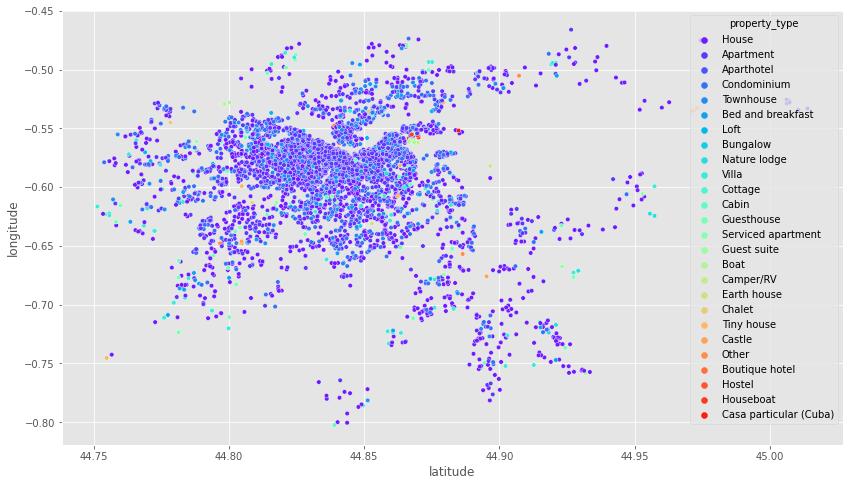

In [72]:
plt.figure(figsize=(14,8))
sns.scatterplot(x=df['latitude'], y=df['longitude'], hue=df["property_type"], s=20, palette="rainbow") 

* From graph 1 and 2 we can see that most properties are apartement or house in several places in Seattle
* The Price range is between 0-200 inmost of the places.¶
* The distribution of Listings like Bunglow,Townhouse,Loft is mostly more in ratio at outskirts of city where possible tourist places
* City center is predominatly apartments and houses

# 9. Check whether number of bathrooms, bedrooms, and review_scores affect pricing?

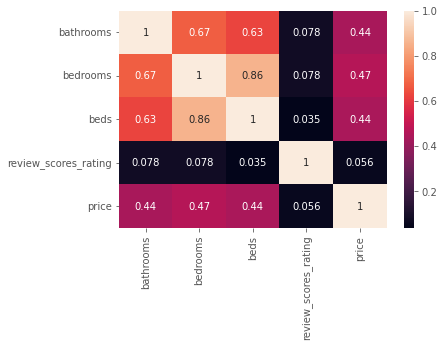

In [73]:
sns.heatmap(
    df[['bathrooms','bedrooms','beds','review_scores_rating','price']].corr(),annot=True
)

We can see above that number of bedrooms, beds, and bathrooms are the top 3 of hig hcorrelated with pricing, with bedrooms is the most highly correlated factor

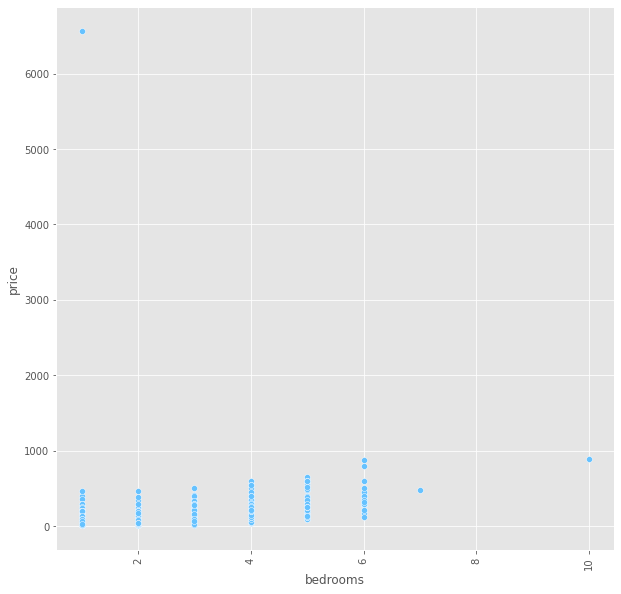

In [74]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
sns.scatterplot(x='bedrooms',y='price',data=df, color = '#66c2ff')

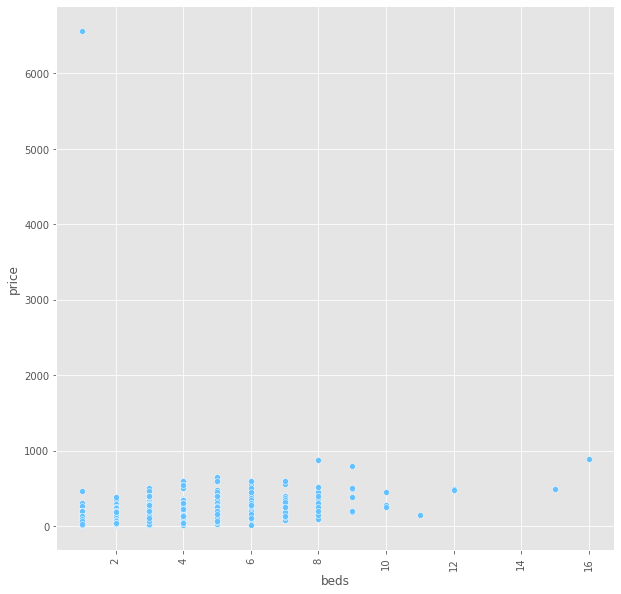

In [75]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
sns.scatterplot(x='beds',y='price',data=df, color = '#66c2ff')

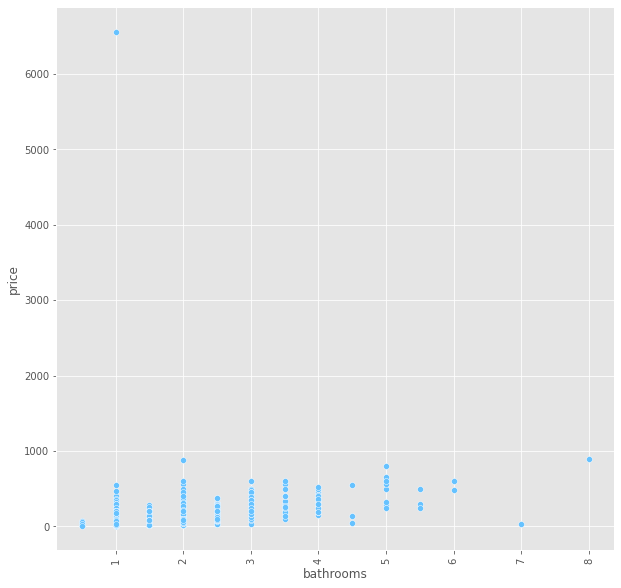

In [76]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
sns.scatterplot(x='bathrooms',y='price',data=df, color = '#66c2ff')

# Summary and Conclusions

It can be concluded that prices of listings depends upon following factors:

1) Price depends on the listing location, the more center the higher the prices

2)  It can be analyzed that for almost all property type, prices for Entire home/apartment are the maximum

3) The type of room chosen by the traveler 

booking an entire property costs maximum followed by private room and shared apartment.

4) Price of a listing also depends upon the number of bedrooms the property have
